# Метод Ньютона и Дихотамии

1. Реализовать **метод Ньютона** с конфигурациями:
    - С точностью ```E = 0.1```
    - С точностью ```E = 0.01```
    - С учетом кратности корня
2. Реализовать **метод Дихотамии** с конфигурациями:
    - С точностью ```E = 0.1```
    - С точностью ```E = 0.01```


В качестве примера взять функцию ```(x - 1)(x - 2)^2(x - 3)^3 = 0```

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'Y')

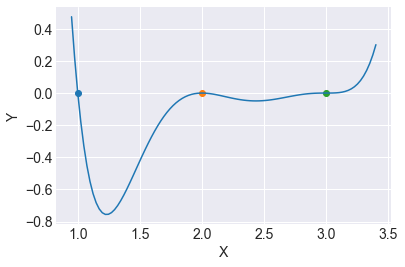

In [35]:
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
plt.style.use('seaborn-dark')
plt.rc('font', size=14)

import warnings
warnings.filterwarnings("ignore")


def func(x):
    return (x - 1) * (x - 2)**2 * (x - 3)**3

x = np.linspace(0.95, 3.4, 100)
fig = plt.figure()
plt.plot(x, [func(num) for num in x])
plt.scatter(1, 0)
plt.scatter(2, 0)
plt.scatter(3, 0)
plt.grid(lw=1)
plt.xlabel('X')
plt.ylabel('Y')

In [76]:
def derivative(f, x, dx):
    return (f(x+dx) - f(x-dx))/(2*dx)

## 1. Метод Ньютона (не понимаю, где ошибка)

In [149]:
rows = 0
def nuton_simple(f, x0, EPS=1e-6, xn=None, x=0):
    count = 0
    x = x
    while count < 10000:
        global rows
        if rows > 5: # временный костыль для удобства отладки
            return
        
        xn = x0 - f(x0) / derivative(f, x0, 0.01)
        count += 1
        
        q = (xn - x0) / (x0 - x)
        if abs((xn - x0)/(1 - q)) < EPS:
            print (xn, count)
            
            p = 1 / (1 - q)
            solver = lambda x: f(x) / (abs(x - xn))**p
            rows += 1
            nuton_simple(solver, x0, EPS, xn, x)
            return
        
        else:
            x = x0
            x0 = xn
    
    return


nuton_simple(func, 4, 0.1)           

3.0558820447848984 9
3.0872623797101544 1
3.1022355521242524 1
3.1593344461324193 1
3.2032589311737674 1
3.2460272377394777 1


Text(0, 0.5, 'Y')

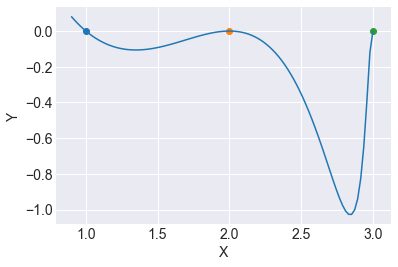

In [75]:
xn = 3.0558820447848984
p = 3.4348940151371035
solver = lambda x: func(x) / (abs(x - xn))**(p)

    
x = np.linspace(0.9, 3., 100)
fig = plt.figure()
plt.plot(x, [solver(val) for val in x])
plt.scatter(1, 0)
plt.scatter(2, 0)
plt.scatter(3, 0)
plt.grid(lw=1)
plt.xlabel('X')
plt.ylabel('Y')

## 2. Метод Дихотамии

In [142]:
res = 0
def dehotam_rec(f, L, R, EPS=0.1):
    x = (L + R) / 2
   
    if abs(L - x) < EPS:
        global res
        res = x
        return 
    
    if f(L)*f(x) < 0:
        dehotam(f, L, x)
    else:
        dehotam(f, x, R)
    

    return 
dehotam_rec(func, -5, 4, 0.01)
print(res)

1.01171875


In [143]:
def dehotam_simple(f, L, R, EPS=0.1):
    while True:
        x = (L + R) / 2
        if abs(L - x) < EPS:
            return x
        
        if f(L)*f(x) < 0:
            R = x
        else:
            L = x


dehotam_simple(func, -5, 4, 0.01)

1.0029296875

In [144]:
dehotam_simple(func, -5, 4, 0.1)

0.9765625